# MULTIVARIATE REGRESSION MODEL


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
from sklearn import linear_model 
import seaborn as sns




In [2]:
a_shape = (1, 2302) 
predicted = np.ones(a_shape)
predicted

array([[1., 1., 1., ..., 1., 1., 1.]])

In [3]:
# Step 1-
# where w means a vector of w1 w2 w3 w4 .....wn which are regression coefficients
def initialize_parameters(lenw):
    w=np.random.randn(1, lenw)
    b=0
    return w ,b

In [4]:
# z= w1.x1+w2.x2+w3.x3+.......+wn.xn+b , where x1,x2,x3....xn are variables
def for_Prop(X,w,b):
    z=np.dot(w,X)+b # multiplying w vector and x matrix
    return z

In [5]:
def loss_function(z,y):
    m=y.shape[1]
    J=(1/(2*m))*np.sum(np.square(z-y))
    return J

In [6]:
def back_Prop(X, y,z):
    m=y.shape[1]
    dz=(1/m)*(z-y)
    dw=np.dot(dz,X.T)# Gradient vector
    db=np.sum(dz)
    return dw , db

In [7]:
def gradient_descent_update(w,b,dw,db,alpha):
    w=w-alpha*dw
    b=b-alpha*db
    return w,b

In [8]:
def linear_regression_model(X_train, y_train, X_test, y_test,learning_rate, epochs):
    lenw=X_train.shape[0]
    w,b=initialize_parameters(lenw) # step-1
    costs_train=[]
    m_train=y_train.shape[1]
    m_test=y_test.shape[1]
    for i in range(1, epochs+1):
        # Training our model
        z_train=for_Prop(X_train,w,b) #step-2
        cost_train=loss_function(z_train, y_train) #step-3
        dw,db=back_Prop(X_train, y_train, z_train) #step-4
        w,b=gradient_descent_update(w,b,dw,db,learning_rate) #step-5
        
        if i%10==0:
            costs_train.append(cost_train)
        # Finding MAE value for our training model    
        MAE_train=(1/m_train)*np.sum(np.abs(z_train-y_train))
        
        # Testing our model
        z_test=for_Prop(X_test,w,b)
        
        cost_test=loss_function(z_test, y_test)
        #finding MAE value for testing our model
        MAE_test=(1/m_test)*np.sum(np.abs(z_test-y_test)) 
        
        print('Epochs '+str(i)+'/'+str(epochs)+': ')
        
        print('Training MAE '+str(MAE_train)+'|'+'Testing MAE '+str(MAE_test))
    print (z_test)
    plt.plot(costs_train)
    plt.xlabel('Iterations(per tens)')
    plt.ylabel('Training Cost')
    return z_test
   
    
        

## Reading CSV File


In [9]:
data=pd.read_csv('kolkata_Data_2000-2020.csv')

In [10]:
data

,Date,Humidity,Evaporation,Rainfall,Temperature,Precipitation,Wind Speed
0,01-01-2000,36.720016,0.000008,0.0,296.462402,0.0,8.027043
1,02-01-2000,43.786797,0.000015,0.0,295.999207,0.0,8.385116
2,03-01-2000,44.161610,0.000014,0.0,295.573242,0.0,8.796876
3,04-01-2000,38.276482,0.000014,0.0,295.761536,0.0,8.647821
4,05-01-2000,43.167194,0.000013,0.0,294.066773,0.0,7.185318
...,...,...,...,...,...,...,...
7666,27-12-2020,35.141602,0.000011,0.0,297.019379,0.0,9.074366
7667,28-12-2020,42.497074,0.000010,0.0,295.728729,0.0,7.608373
7668,29-12-2020,41.381065,0.000010,0.0,297.028809,0.0,6.050164
7669,30-12-2020,49.898449,0.000010,0.0,296.585266,0.0,6.986880


In [11]:
data.describe()

,Humidity,Evaporation,Rainfall,Temperature,Precipitation,Wind Speed
count,7671.000000,7.671000e+03,7.671000e+03,7671.000000,7671.000000,7671.000000
mean,54.376826,1.665765e-05,6.472002e-06,303.498660,0.539781,7.811248
std,18.807253,1.473741e-05,3.271383e-05,4.614534,1.029340,2.707275
min,6.037169,2.980000e-07,0.000000e+00,287.271912,0.000000,1.910291
25%,40.311434,6.200000e-06,0.000000e+00,300.720489,0.000000,5.907914
50%,52.029457,1.110000e-05,0.000000e+00,303.690979,0.000000,7.243742
75%,70.520931,2.260000e-05,9.540000e-07,306.333679,0.765625,9.216869
max,95.817490,7.990000e-05,1.730919e-03,318.201019,32.796875,23.526308


In [12]:
data.shape


(7671, 7)

In [13]:
dependent_variable='Temperature'
date='Date'
prec='Precipitation'
rain='Rainfall'

In [14]:
independent_variables=data.columns.tolist()



In [15]:
independent_variables.remove(dependent_variable)
independent_variables.remove(date)
# independent_variables.remove(prec)
independent_variables.remove(rain)




In [16]:
independent_variables

['Humidity', 'Evaporation', 'Precipitation', 'Wind Speed']

In [17]:
X=data[independent_variables].values
y=data[dependent_variable].values

In [18]:
X


array([[3.67200165e+01, 7.99000000e-06, 0.00000000e+00, 8.02704334e+00],
       [4.37867966e+01, 1.47000000e-05, 0.00000000e+00, 8.38511562e+00],
       [4.41616097e+01, 1.39000000e-05, 0.00000000e+00, 8.79687595e+00],
       ...,
       [4.13810654e+01, 1.04000000e-05, 0.00000000e+00, 6.05016375e+00],
       [4.98984489e+01, 1.01000000e-05, 0.00000000e+00, 6.98687983e+00],
       [4.53705368e+01, 1.00000000e-05, 0.00000000e+00, 7.94798088e+00]])

In [19]:
y

array([296.4624023, 295.9992065, 295.5732422, ..., 297.0288086,
       296.5852661, 296.4746094])

## Normalizing Data

In [20]:
# splitting the dataset into trainig set and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [21]:
X_train

array([[9.28562775e+01, 1.73000000e-06, 1.03125000e+00, 1.38973103e+01],
       [5.16353531e+01, 2.03000000e-05, 0.00000000e+00, 6.25621176e+00],
       [5.92134132e+01, 6.21000000e-05, 7.81250000e-03, 3.35292053e+00],
       ...,
       [6.84965439e+01, 1.57000000e-05, 8.90625000e-01, 7.51323795e+00],
       [3.30589142e+01, 1.78000000e-05, 0.00000000e+00, 6.19663429e+00],
       [7.04717560e+01, 1.66000000e-05, 1.03125000e+00, 6.46013498e+00]])

In [22]:
#  Normalizing data 
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:

a=X_train
a=pd.DataFrame(a,columns=['Humidity','Evaporation','Precipitation','Wind Speed'])
a



,Humidity,Evaporation,Precipitation,Wind Speed
0,0.971220,0.017989,0.073374,0.562815
1,0.510093,0.251275,0.000000,0.204050
2,0.594867,0.776388,0.000556,0.067734
3,0.760296,0.528906,0.053363,0.411080
4,0.689002,0.601769,0.013341,0.184512
...,...,...,...,...
5364,0.807420,0.129419,0.153419,0.332714
5365,0.493819,0.119118,0.000000,0.175239
5366,0.698715,0.193488,0.063369,0.263070
5367,0.302284,0.219869,0.000000,0.201252


In [24]:
a.describe()

,Humidity,Evaporation,Precipitation,Wind Speed
count,5369.000000,5369.000000,5369.000000,5369.000000
mean,0.539867,0.205950,0.038223,0.277407
std,0.210475,0.185419,0.068048,0.127561
min,0.000000,0.000000,0.000000,0.000000
25%,0.382603,0.073390,0.000000,0.187434
50%,0.514942,0.136956,0.000000,0.250458
75%,0.719379,0.282681,0.055586,0.344110
max,1.000000,1.000000,1.000000,1.000000


In [25]:
X_train.shape

(5369, 4)

In [26]:
X_train=X_train.T

In [27]:
X_train.shape

(4, 5369)

In [28]:
y_train.shape

(5369,)

In [29]:
y_train=np.array([y_train])

In [30]:
y_train.shape

(1, 5369)

In [31]:
X_test=X_test.T

In [32]:
X_test.shape

(4, 2302)

In [33]:
y_test=np.array([y_test])

In [34]:
y_test.shape

(1, 2302)

Epochs 1/6000: 
Training MAE 303.05464622074675|Testing MAE 88.85856576323701
Epochs 2/6000: 
Training MAE 89.09160925089688|Testing MAE 30.72936116747671
Epochs 3/6000: 
Training MAE 31.012666123734636|Testing MAE 24.53731181525424
Epochs 4/6000: 
Training MAE 24.581541957754922|Testing MAE 23.70340604235327
Epochs 5/6000: 
Training MAE 23.684907059239364|Testing MAE 23.248002557948368
Epochs 6/6000: 
Training MAE 23.21061535130444|Testing MAE 22.82195750357351
Epochs 7/6000: 
Training MAE 22.77487476522739|Testing MAE 22.403932188649517
Epochs 8/6000: 
Training MAE 22.351214695123005|Testing MAE 21.99370862773206
Epochs 9/6000: 
Training MAE 21.93732663941113|Testing MAE 21.591760324230883
Epochs 10/6000: 
Training MAE 21.53203159008155|Testing MAE 21.198103101910878
Epochs 11/6000: 
Training MAE 21.135419222069203|Testing MAE 20.812556980921613
Epochs 12/6000: 
Training MAE 20.74709235981163|Testing MAE 20.435030851457668
Epochs 13/6000: 
Training MAE 20.366879959111667|Testing MAE 

Epochs 702/6000: 
Training MAE 3.1401360825694935|Testing MAE 3.1619443763203408
Epochs 703/6000: 
Training MAE 3.1399188935682365|Testing MAE 3.1617364966896964
Epochs 704/6000: 
Training MAE 3.1397021228732953|Testing MAE 3.1615289801300763
Epochs 705/6000: 
Training MAE 3.139485769154424|Testing MAE 3.161321825681014
Epochs 706/6000: 
Training MAE 3.1392698310883254|Testing MAE 3.161115921706462
Epochs 707/6000: 
Training MAE 3.1390545311720137|Testing MAE 3.160912591642314
Epochs 708/6000: 
Training MAE 3.13884058120271|Testing MAE 3.1607096136399284
Epochs 709/6000: 
Training MAE 3.1386281887974756|Testing MAE 3.1605069867854327
Epochs 710/6000: 
Training MAE 3.1384196938493965|Testing MAE 3.1603047101691164
Epochs 711/6000: 
Training MAE 3.138211598267983|Testing MAE 3.1601027828854034
Epochs 712/6000: 
Training MAE 3.1380039007940757|Testing MAE 3.1599012040328223
Epochs 713/6000: 
Training MAE 3.1377966001750637|Testing MAE 3.159699972713997
Epochs 714/6000: 
Training MAE 3.137

Epochs 1429/6000: 
Training MAE 3.078394066934699|Testing MAE 3.0971389349311123
Epochs 1430/6000: 
Training MAE 3.078371223344781|Testing MAE 3.0971120162302332
Epochs 1431/6000: 
Training MAE 3.0783487175458633|Testing MAE 3.097085136621347
Epochs 1432/6000: 
Training MAE 3.0783262447151194|Testing MAE 3.097058296047579
Epochs 1433/6000: 
Training MAE 3.07830380480257|Testing MAE 3.097031494452145
Epochs 1434/6000: 
Training MAE 3.078281397758326|Testing MAE 3.0970047317783416
Epochs 1435/6000: 
Training MAE 3.0782590235325866|Testing MAE 3.0969780079695335
Epochs 1436/6000: 
Training MAE 3.0782366820756253|Testing MAE 3.0969513994950097
Epochs 1437/6000: 
Training MAE 3.078214773575896|Testing MAE 3.096924920008741
Epochs 1438/6000: 
Training MAE 3.078193276894301|Testing MAE 3.0968984789840968
Epochs 1439/6000: 
Training MAE 3.0781718116988404|Testing MAE 3.0968720763650754
Epochs 1440/6000: 
Training MAE 3.07815037794181|Testing MAE 3.0968457120957535
Epochs 1441/6000: 
Training M

Epochs 2154/6000: 
Training MAE 3.071373209302719|Testing MAE 3.0886460787663825
Epochs 2155/6000: 
Training MAE 3.071370366014936|Testing MAE 3.088641897021779
Epochs 2156/6000: 
Training MAE 3.0713675268556404|Testing MAE 3.088637721347483
Epochs 2157/6000: 
Training MAE 3.071364691818831|Testing MAE 3.0886335517346764
Epochs 2158/6000: 
Training MAE 3.07136186089851|Testing MAE 3.0886293881745583
Epochs 2159/6000: 
Training MAE 3.0713590340886943|Testing MAE 3.0886252306583506
Epochs 2160/6000: 
Training MAE 3.0713562113834136|Testing MAE 3.0886210791772712
Epochs 2161/6000: 
Training MAE 3.071353392776698|Testing MAE 3.088616933722552
Epochs 2162/6000: 
Training MAE 3.071350578262582|Testing MAE 3.0886127942854533
Epochs 2163/6000: 
Training MAE 3.0713477678351255|Testing MAE 3.0886086608572327
Epochs 2164/6000: 
Training MAE 3.071344961488383|Testing MAE 3.0886045334291747
Epochs 2165/6000: 
Training MAE 3.0713421592164294|Testing MAE 3.0886004119925574
Epochs 2166/6000: 
Training

Epochs 2877/6000: 
Training MAE 3.0706957675895676|Testing MAE 3.087115165476851
Epochs 2878/6000: 
Training MAE 3.0706956523165387|Testing MAE 3.087114424253614
Epochs 2879/6000: 
Training MAE 3.070695537210839|Testing MAE 3.087113684106311
Epochs 2880/6000: 
Training MAE 3.0706954222722307|Testing MAE 3.0871129450333736
Epochs 2881/6000: 
Training MAE 3.0706953075004675|Testing MAE 3.087112207033245
Epochs 2882/6000: 
Training MAE 3.070695192895309|Testing MAE 3.087111470104365
Epochs 2883/6000: 
Training MAE 3.0706950784565117|Testing MAE 3.0871107342451802
Epochs 2884/6000: 
Training MAE 3.070694964183834|Testing MAE 3.0871099994541362
Epochs 2885/6000: 
Training MAE 3.0706948500770346|Testing MAE 3.0871092657296875
Epochs 2886/6000: 
Training MAE 3.070694736135876|Testing MAE 3.087108533070284
Epochs 2887/6000: 
Training MAE 3.0706946223601164|Testing MAE 3.0871078014743745
Epochs 2888/6000: 
Training MAE 3.070694508749512|Testing MAE 3.087107070940423
Epochs 2889/6000: 
Training 

Epochs 3633/6000: 
Training MAE 3.0706974976374797|Testing MAE 3.086805416568093
Epochs 3634/6000: 
Training MAE 3.07069752921965|Testing MAE 3.086805249782897
Epochs 3635/6000: 
Training MAE 3.0706975607559746|Testing MAE 3.0868050832397955
Epochs 3636/6000: 
Training MAE 3.0706975922465203|Testing MAE 3.0868049169384486
Epochs 3637/6000: 
Training MAE 3.0706976236913612|Testing MAE 3.0868047508784913
Epochs 3638/6000: 
Training MAE 3.070697655090553|Testing MAE 3.086804585059582
Epochs 3639/6000: 
Training MAE 3.070697686444168|Testing MAE 3.0868044194813686
Epochs 3640/6000: 
Training MAE 3.0706977177522727|Testing MAE 3.0868042541435057
Epochs 3641/6000: 
Training MAE 3.0706977490149368|Testing MAE 3.0868040890456347
Epochs 3642/6000: 
Training MAE 3.0706977802322153|Testing MAE 3.0868039241874157
Epochs 3643/6000: 
Training MAE 3.0706978114041825|Testing MAE 3.0868037595684945
Epochs 3644/6000: 
Training MAE 3.0706978425308993|Testing MAE 3.08680359518853
Epochs 3645/6000: 
Traini

Epochs 4417/6000: 
Training MAE 3.070719738290801|Testing MAE 3.0867306504741983
Epochs 4418/6000: 
Training MAE 3.0707197694629897|Testing MAE 3.0867306097001768
Epochs 4419/6000: 
Training MAE 3.070719800589933|Testing MAE 3.0867305689853404
Epochs 4420/6000: 
Training MAE 3.0707198316716924|Testing MAE 3.086730528329602
Epochs 4421/6000: 
Training MAE 3.070719862708332|Testing MAE 3.0867304877328787
Epochs 4422/6000: 
Training MAE 3.0707198936999216|Testing MAE 3.0867304471950803
Epochs 4423/6000: 
Training MAE 3.0707199246465215|Testing MAE 3.086730406716132
Epochs 4424/6000: 
Training MAE 3.0707199555482085|Testing MAE 3.0867303662959396
Epochs 4425/6000: 
Training MAE 3.070719986405037|Testing MAE 3.0867303259344148
Epochs 4426/6000: 
Training MAE 3.0707200172170728|Testing MAE 3.08673028563148
Epochs 4427/6000: 
Training MAE 3.0707200479843837|Testing MAE 3.0867302453870447
Epochs 4428/6000: 
Training MAE 3.0707200787070312|Testing MAE 3.0867302052010284
Epochs 4429/6000: 
Train

Epochs 5107/6000: 
Training MAE 3.0707333312441953|Testing MAE 3.0867128705423275
Epochs 5108/6000: 
Training MAE 3.070733342685437|Testing MAE 3.0867128555768972
Epochs 5109/6000: 
Training MAE 3.070733354110066|Testing MAE 3.0867128406331896
Epochs 5110/6000: 
Training MAE 3.0707333655181124|Testing MAE 3.086712825711169
Epochs 5111/6000: 
Training MAE 3.0707333769095944|Testing MAE 3.0867128108108113
Epochs 5112/6000: 
Training MAE 3.070733388284544|Testing MAE 3.0867127959320837
Epochs 5113/6000: 
Training MAE 3.0707333996429824|Testing MAE 3.0867127810749544
Epochs 5114/6000: 
Training MAE 3.0707334109849342|Testing MAE 3.08671276623939
Epochs 5115/6000: 
Training MAE 3.0707334223104223|Testing MAE 3.086712751425361
Epochs 5116/6000: 
Training MAE 3.070733433619471|Testing MAE 3.086712736632835
Epochs 5117/6000: 
Training MAE 3.0707334449121033|Testing MAE 3.086712721861785
Epochs 5118/6000: 
Training MAE 3.0707334561883486|Testing MAE 3.0867127071121705
Epochs 5119/6000: 
Trainin

Epochs 5876/6000: 
Training MAE 3.0707386339594396|Testing MAE 3.08670593445471
Epochs 5877/6000: 
Training MAE 3.070738637703481|Testing MAE 3.0867059295574077
Epochs 5878/6000: 
Training MAE 3.0707386414420865|Testing MAE 3.0867059246672137
Epochs 5879/6000: 
Training MAE 3.0707386451752647|Testing MAE 3.0867059197841216
Epochs 5880/6000: 
Training MAE 3.0707386489030277|Testing MAE 3.0867059149081126
Epochs 5881/6000: 
Training MAE 3.0707386526253746|Testing MAE 3.086705910039184
Epochs 5882/6000: 
Training MAE 3.070738656342321|Testing MAE 3.0867059051773205
Epochs 5883/6000: 
Training MAE 3.0707386600538698|Testing MAE 3.0867059003225186
Epochs 5884/6000: 
Training MAE 3.0707386637600345|Testing MAE 3.0867058954747626
Epochs 5885/6000: 
Training MAE 3.070738667460819|Testing MAE 3.0867058906340414
Epochs 5886/6000: 
Training MAE 3.070738671156229|Testing MAE 3.086705885800346
Epochs 5887/6000: 
Training MAE 3.070738674846275|Testing MAE 3.086705880973672
Epochs 5888/6000: 
Trainin

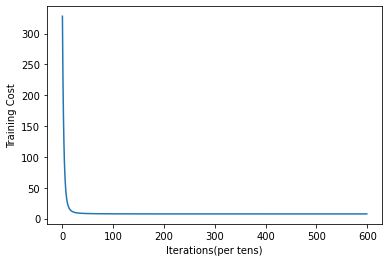

In [35]:
# Feeding training and testing data to our model  
predicted=linear_regression_model(X_train, y_train, X_test, y_test, 0.5, 6000)

# Comparing our Model with Scikit learn Regression Model

In [36]:
linear_regression=linear_model.LinearRegression()

In [37]:
model=linear_regression.fit(X_train.T,y_train.T)
predictions=linear_regression.predict(X_test.T)

In [38]:
predictions.shape

(2302, 1)

In [39]:
pred=predictions.T
print(pred)

[[300.75269865 303.65806277 303.96861381 ... 308.41020639 303.12549173
  304.88682875]]


In [40]:
print(predicted)

MAE_val_with_sklearn=(1/y_test.shape[1])*np.sum(np.abs(predictions-y_test.T))

[[300.75275117 303.65833605 303.96862982 ... 308.41013819 303.12538265
  304.88662914]]


In [41]:
pred=predictions.T
print(pred)
print(MAE_val_with_sklearn)

[[300.75269865 303.65806277 303.96861381 ... 308.41020639 303.12549173
  304.88682875]]
3.086703387096852


      Our Model predicton  Sklearn model Prediction
0              300.752699                300.752751
1              303.658063                303.658336
2              303.968614                303.968630
3              301.688782                301.688924
4              301.072418                301.072576
...                   ...                       ...
2297           303.321686                303.321323
2298           307.150141                307.150326
2299           308.410206                308.410138
2300           303.125492                303.125383
2301           304.886829                304.886629

[2302 rows x 2 columns]


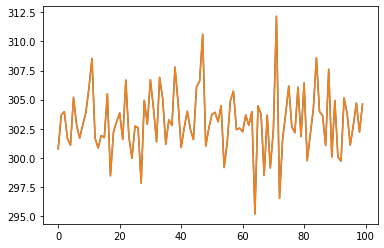

In [47]:
df2 = pd.DataFrame({'Our Model predicton': pred.flatten(), 'Sklearn model Prediction': predicted.flatten()})
print(df2)
df3=df2.head(100)
plt.plot(df3['Our Model predicton'])
plt.plot(df3['Sklearn model Prediction'])
plt.show()

## Comparing the Actual And Predicted Value

In [43]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})
df


,Actual,Predicted
0,304.073975,300.752699
1,303.774292,303.658063
2,297.985077,303.968614
3,305.177582,301.688782
4,295.287109,301.072418
...,...,...
2297,307.443726,303.321686
2298,310.132477,307.150141
2299,309.244568,308.410206
2300,298.334228,303.125492


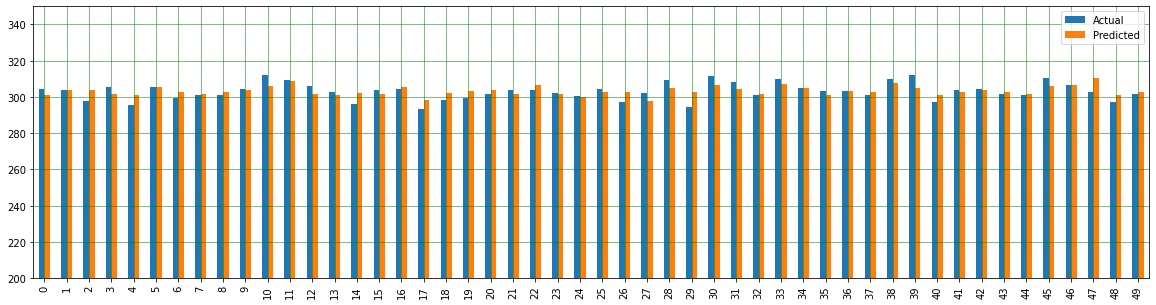

In [44]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(20,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylim([200, 350])
plt.show()

# Accuracy of Model

In [45]:

errors = abs(y_test-pred)
err_per = 100 * (errors/y_test)
accuracy = 100 - np.mean(err_per)
print("Multivariate linear Regression: ", round(accuracy, 2), "%")

Multivariate linear Regression:  98.98 %


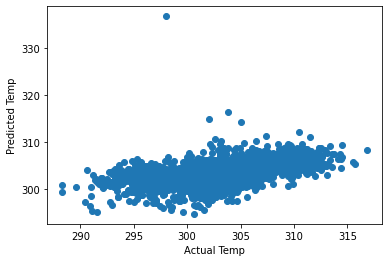

In [46]:
plt.scatter(y_test, pred)
plt.xlabel('Actual Temp')
plt.ylabel('Predicted Temp')
# plt.ylim([290, 330])
plt.show()